In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load airport data
apt_data = pd.read_csv('NZWN.csv', na_values=['M'], low_memory=False)

#Get general data
apt_data.head()

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,NZWN,2020-01-01 00:00,66.2,57.2,72.74,10.0,23.0,0.0,29.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.2,NZWN 010000Z AUTO 01023KT 9999 BKN018/// 19/14...,NaN
1,NZWN,2020-01-01 00:30,68.0,57.2,68.35,360.0,28.0,0.0,29.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NZWN 010030Z AUTO 36028KT 9999 BKN019/// 20/14...,NaN
2,NZWN,2020-01-01 01:00,68.0,57.2,68.35,10.0,26.0,0.0,29.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NZWN 010100Z AUTO 01026KT 9999 SCT021/// 20/14...,NaN
3,NZWN,2020-01-01 01:30,68.0,59.0,72.92,10.0,24.0,0.0,29.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NZWN 010130Z AUTO 01024KT 9999 FEW020/// 20/15...,NaN
4,NZWN,2020-01-01 02:00,68.0,59.0,72.92,10.0,26.0,0.0,29.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NZWN 010200Z AUTO 01026KT 9999 SCT019/// 20/15...,NaN


In [35]:
# make date and time column the index of data frame

apt_data.set_index('valid', inplace=True)
apt_data.index = pd.to_datetime(apt_data.index)

# create descriptive statistics for weather data at wellington airport

apt_data.describe()

,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,...,skyl3,skyl4,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,snowdepth
count,104436.000000,104436.000000,104436.000000,104461.000000,104461.000000,104462.0,104461.000000,0.0,104393.000000,13008.000000,...,12282.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,104436.000000,0.0
mean,57.766977,50.367391,77.238621,186.202315,13.346418,0.0,29.983010,NaN,5.980333,33.424431,...,4981.957336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.361207,NaN
std,6.667172,6.680052,11.693456,132.432590,6.952756,0.0,0.941043,NaN,0.855066,6.352887,...,1961.019066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.494120,NaN
min,35.600000,24.800000,27.270000,0.000000,0.000000,0.0,28.910000,NaN,0.060000,14.000000,...,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.270000,NaN
25%,53.600000,46.400000,68.750000,30.000000,8.000000,0.0,29.800000,NaN,6.210000,29.000000,...,3500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.600000,NaN
50%,57.200000,50.000000,77.140000,180.000000,13.000000,0.0,30.000000,NaN,6.210000,33.000000,...,4600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.200000,NaN
75%,62.600000,55.400000,87.280000,340.000000,18.000000,0.0,30.150000,NaN,6.210000,37.000000,...,6000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.600000,NaN
max,84.200000,69.800000,100.000000,360.000000,47.000000,0.0,99.990000,NaN,6.210000,62.000000,...,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.030000,NaN


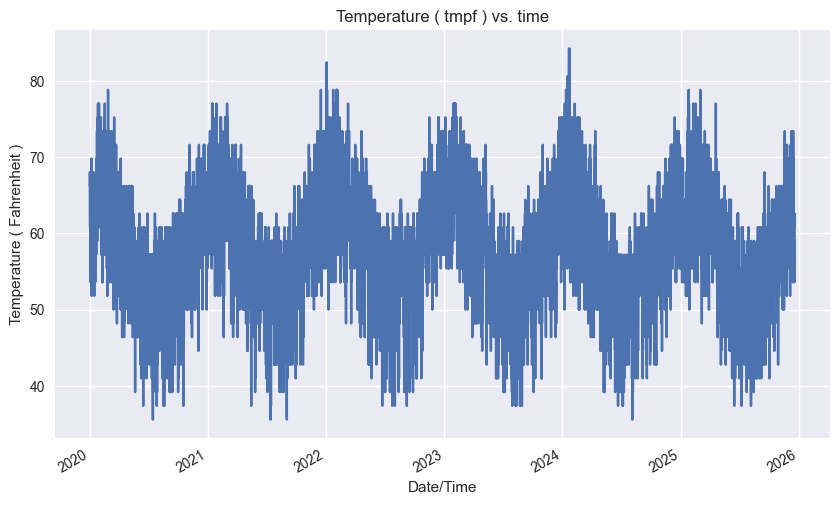

In [36]:
## Convert tmpf to numeric

apt_data['tmpf'] = pd.to_numeric(apt_data['tmpf'], errors='coerce')

## Create time plot
plt.style.use("seaborn-v0_8")

## plot time series for temperature ( denotes as tmpf in csv )
plt.figure(figsize=(10,6))
apt_data['tmpf'].plot(title='Temperature ( tmpf ) vs. time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature ( Fahrenheit )' )
plt.savefig('temperature_v_time.png')
plt.show()

In [37]:
## pull out seasonal patterns for temperature
apt_data['year'] = apt_data.index.year
apt_data['month'] = apt_data.index.month
apt_data.reset_index(inplace=True)
apt_data['week'] = apt_data['valid'].dt.isocalendar().week
apt_data['day'] = apt_data['valid'].dt.dayofweek
apt_data['hour'] = apt_data['valid'].dt.hour
apt_data['day_str'] = apt_data['valid'].dt.strftime('%j')
apt_data['year_month'] = apt_data['valid'].dt.strftime('%m')
apt_data.set_index('valid', inplace=True)

In [38]:
apt_data.head()

,station,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,...,feel,metar,snowdepth,year,month,week,day,hour,day_str,year_month
valid,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NZWN,66.2,57.2,72.74,10.0,23.0,0.0,29.97,NaN,6.21,...,66.2,NZWN 010000Z AUTO 01023KT 9999 BKN018/// 19/14...,NaN,2020,1,1,2,0,001,01
2020-01-01 00:30:00,NZWN,68.0,57.2,68.35,360.0,28.0,0.0,29.94,NaN,6.21,...,68.0,NZWN 010030Z AUTO 36028KT 9999 BKN019/// 20/14...,NaN,2020,1,1,2,0,001,01
2020-01-01 01:00:00,NZWN,68.0,57.2,68.35,10.0,26.0,0.0,29.94,NaN,6.21,...,68.0,NZWN 010100Z AUTO 01026KT 9999 SCT021/// 20/14...,NaN,2020,1,1,2,1,001,01
2020-01-01 01:30:00,NZWN,68.0,59.0,72.92,10.0,24.0,0.0,29.94,NaN,6.21,...,68.0,NZWN 010130Z AUTO 01024KT 9999 FEW020/// 20/15...,NaN,2020,1,1,2,1,001,01
2020-01-01 02:00:00,NZWN,68.0,59.0,72.92,10.0,26.0,0.0,29.94,NaN,6.21,...,68.0,NZWN 010200Z AUTO 01026KT 9999 SCT019/// 20/15...,NaN,2020,1,1,2,2,001,01


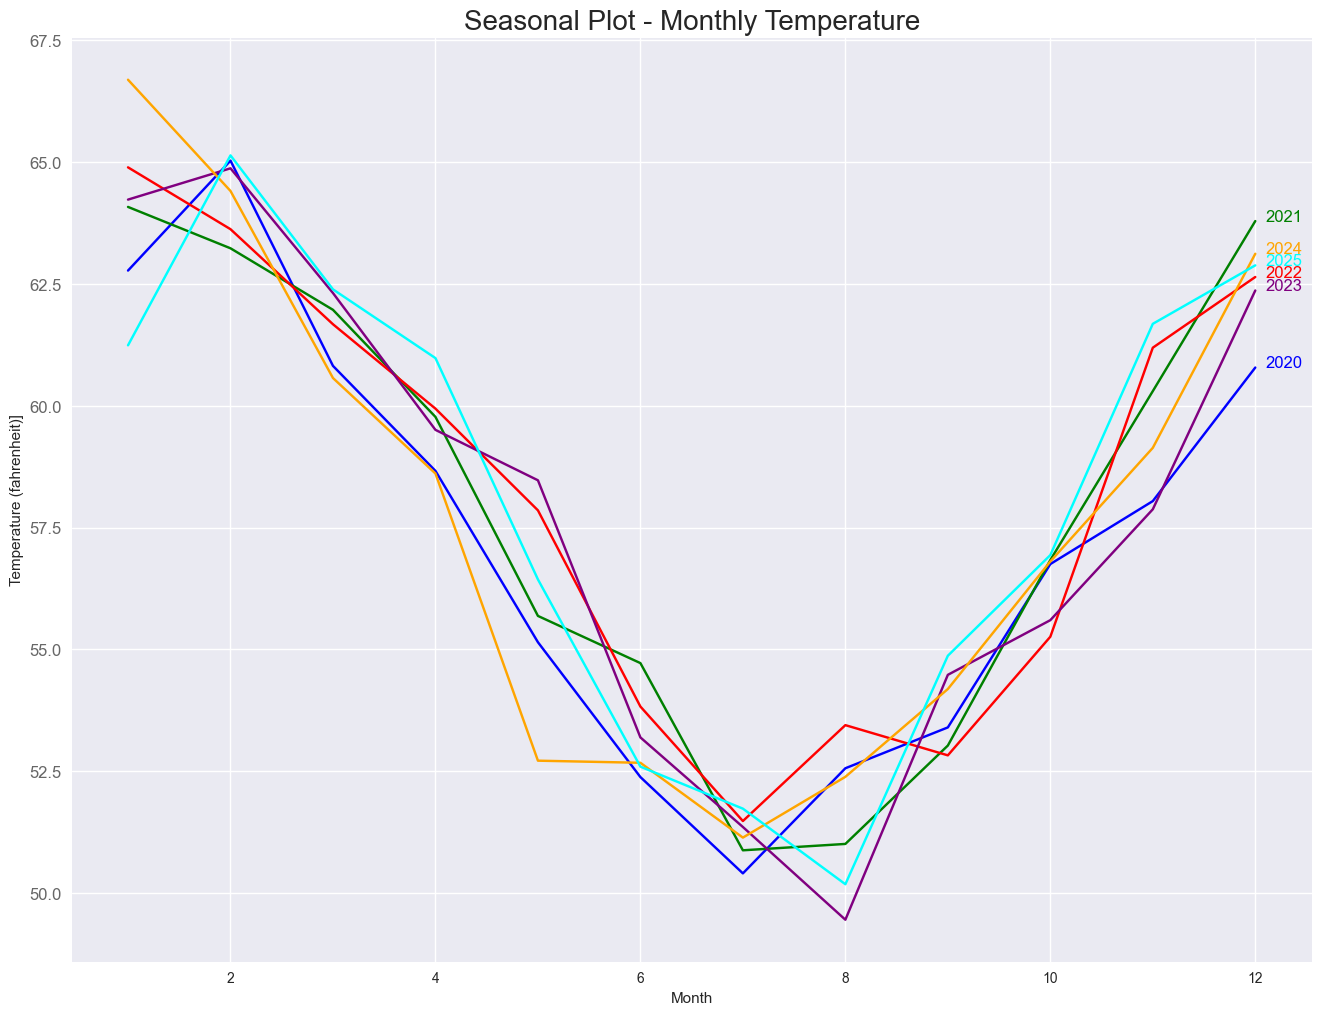

In [39]:
# Seasonal patterns for temperature on monthly basis
np.random.seed(42)
df_plot = apt_data[['year', 'month', 'tmpf']].dropna().groupby(['month', 'year']).mean()[['tmpf']].reset_index()
years = df_plot['year'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'black']

## plot for monthly temperature patterns
plt.figure(figsize=(16,12))
for i, year in enumerate(years):
    if i < len(colors):
        plt.plot('month', 'tmpf', data=df_plot[df_plot['year'] == year], color=colors[i], label=year)
        if year == 2018:
            plt.text(df_plot.loc[df_plot.year==year, :].shape[0]+0.3, df_plot.loc[df_plot.year==year, 'tmpf'][-1:].values[0], year, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==year, :].shape[0]+0.1, df_plot.loc[df_plot.year==year, 'tmpf'][-1:].values[0], year, fontsize=12, color=colors[i])

plt.gca().set(ylabel= 'tmpf', xlabel= 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Temperature", fontsize=20)
plt.ylabel('Temperature (fahrenheit)]')
plt.xlabel('Month')
plt.savefig('temperature_seasonal.png')
plt.show()

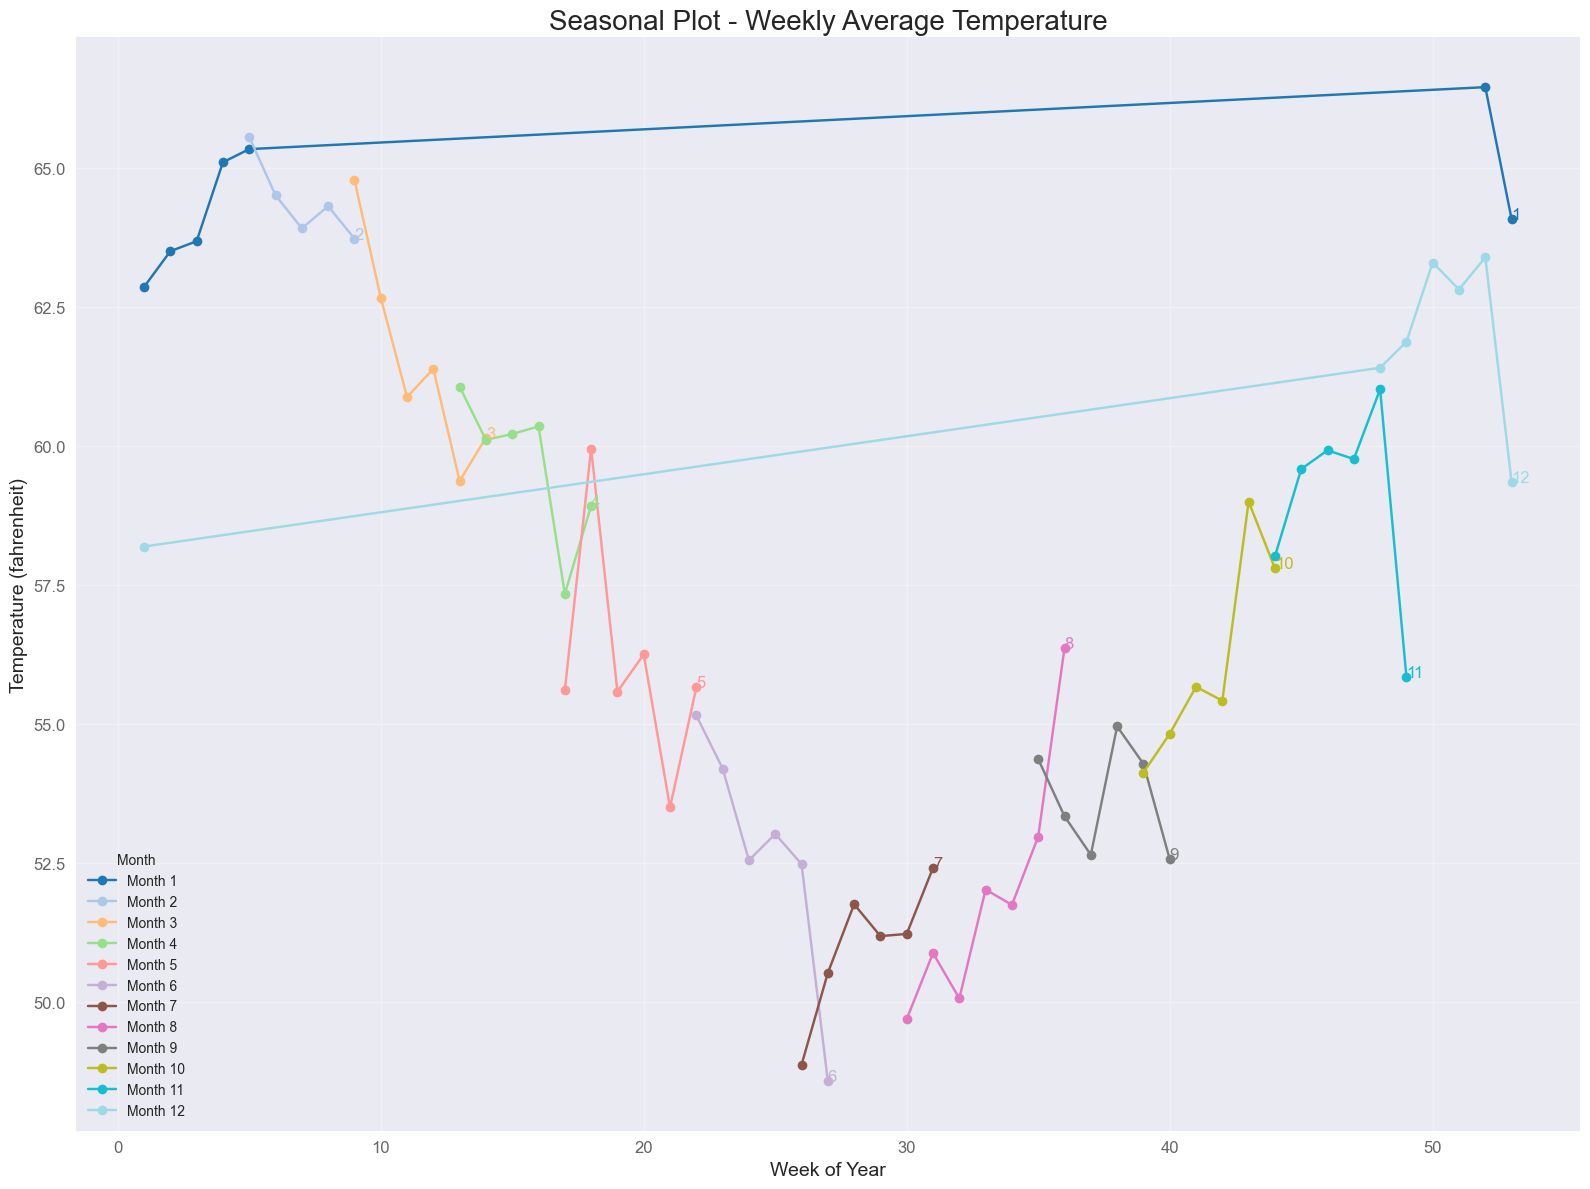

In [40]:
## Seasonal patterns for temperature on a weekly basis
np.random.seed(42)
df_plot = apt_data[['month', 'week', 'tmpf']].dropna()
df_plot = df_plot.groupby(['week', 'month']).mean()[['tmpf']].reset_index()
df_plot = df_plot.sort_values(by='week', ascending=True)

# Defining the color palette
months = sorted(df_plot['month'].unique())
colors = plt.colormaps.get_cmap('tab20')(np.linspace(0, 1, len(months)))

# plot figures for weekly wind speeds
plt.figure(figsize=(16, 12))
for i, month in enumerate(months):
    month_data = df_plot[df_plot['month'] == month]
    plt.plot(month_data['week'], month_data['tmpf'], color=colors[i], label=f'Month {month}', marker='o')
    # Place text at the last actual data point
    if len(month_data) > 0:
        last_week = month_data['week'].iloc[-1]
        last_tmpf = month_data['tmpf'].iloc[-1]
        plt.text(last_week, last_tmpf, f'{month}', fontsize=12, color=colors[i])

# Setting labels and titles
plt.xlabel('Week of Year', fontsize=14)
plt.ylabel('Temperature (fahrenheit)', fontsize=14)
plt.title('Seasonal Plot - Weekly Average Temperature', fontsize=20)
plt.xticks(fontsize=12, alpha=0.7)
plt.yticks(fontsize=12, alpha=0.7)
plt.legend(title='Month', loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temperature_seasonal_weekly.png')
plt.show()

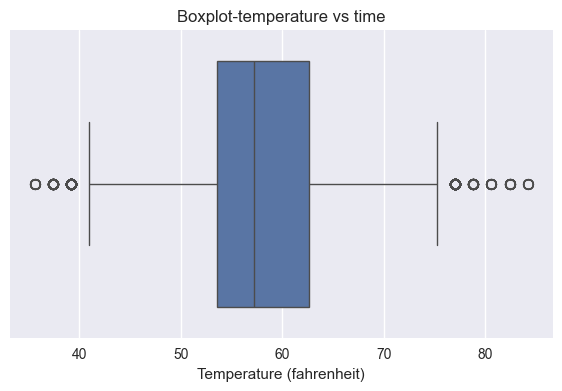

In [41]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.boxplot(data=apt_data, x='tmpf')
plt.xlabel('Temperature (fahrenheit)')
plt.title(f'Boxplot-temperature vs time')
plt.savefig('temperature_boxplot.png')
plt.show()

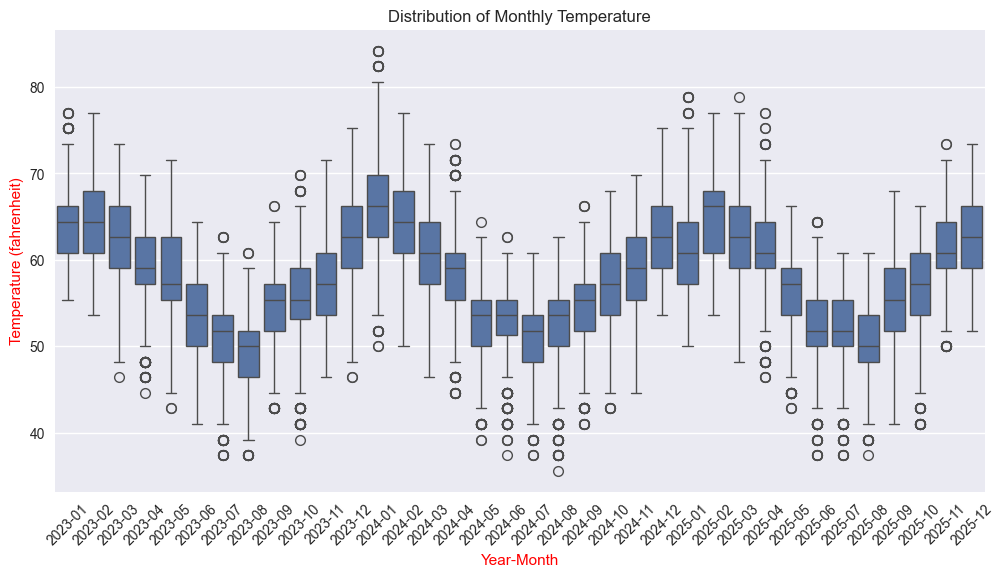

In [42]:
# distribution of box plots for monthly temperature
apt_data['year'] = apt_data.index.year
apt_data['month'] = apt_data.index.month
apt_data['year_month'] = apt_data.index.strftime('%Y-%m')

#filter for 2023 and later

apt_dplot = apt_data[apt_data['year'] >=2023]

plt.figure(figsize=(12,6))
sns.boxplot(data=apt_dplot, x='year_month', y='tmpf')
plt.title('Distribution of Monthly Temperature')
plt.xlabel('Year-Month', color='red')
plt.ylabel('Temperature (fahrenheit)', color='red')
plt.xticks(rotation=45)
plt.savefig('temperature_distribution.png')
plt.show()

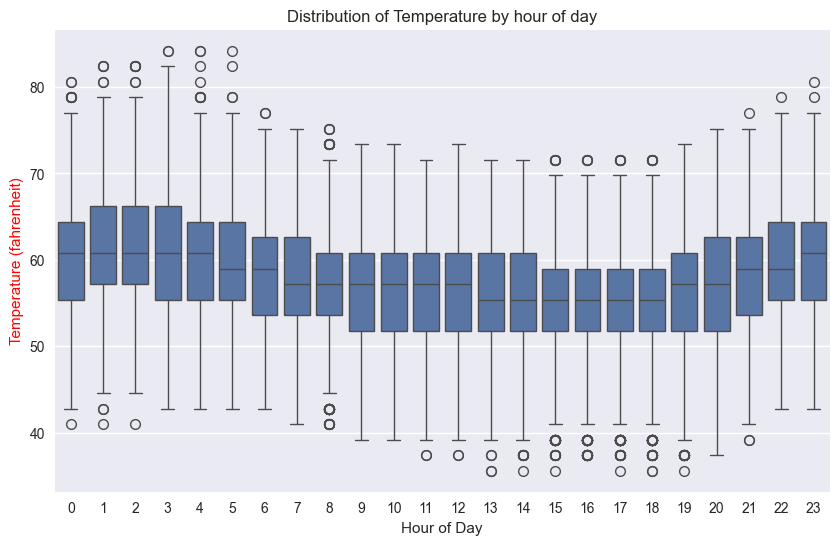

In [43]:
# Distribution of temperature by hour
plt.figure(figsize=(10,6))
sns.boxplot(x=apt_data['hour'], y=apt_data['tmpf'])
plt.title('Distribution of Temperature by hour of day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (fahrenheit)', color='red')
plt.savefig('temperature_distribution_hourly.png')
plt.show()